# Датасет для прогнозирования цен на квартиру

In [1]:
df <- read.csv("train.csv")
numeric_columns <- c("BHK_NO.", "SQUARE_FT", "LONGITUDE", "LATITUDE", "TARGET.PRICE_IN_LACS.")
head(df)

POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET.PRICE_IN_LACS.
Owner,0,0,2,BHK,1300.2364,1,1,"Ksfc Layout,Bangalore",12.96991,77.59796,55.0
Dealer,0,0,2,BHK,1275.0000,1,1,"Vishweshwara Nagar,Mysore",12.27454,76.64460,51.0
Owner,0,0,2,BHK,933.1597,1,1,"Jigani,Bangalore",12.77803,77.63219,43.0
Owner,0,1,2,BHK,929.9211,1,1,"Sector-1 Vaishali,Ghaziabad",28.64230,77.34450,62.5
Dealer,1,0,2,BHK,999.0092,0,1,"New Town,Kolkata",22.59220,88.48491,60.5
Owner,0,0,3,BHK,1250.0000,1,1,"South Chittoor,Kochi",10.03328,76.28257,42.0


## Характеристики для каждого из числовых столбцов

In [34]:
summary(df)

  POSTED_BY         UNDER_CONSTRUCTION      RERA           BHK_NO.      
 Length:29451       Min.   :0.0000     Min.   :0.0000   Min.   : 1.000  
 Class :character   1st Qu.:0.0000     1st Qu.:0.0000   1st Qu.: 2.000  
 Mode  :character   Median :0.0000     Median :0.0000   Median : 2.000  
                    Mean   :0.1798     Mean   :0.3179   Mean   : 2.392  
                    3rd Qu.:0.0000     3rd Qu.:1.0000   3rd Qu.: 3.000  
                    Max.   :1.0000     Max.   :1.0000   Max.   :20.000  
  BHK_OR_RK           SQUARE_FT         READY_TO_MOVE        RESALE      
 Length:29451       Min.   :        3   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:      900   1st Qu.:1.0000   1st Qu.:1.0000  
 Mode  :character   Median :     1175   Median :1.0000   Median :1.0000  
                    Mean   :    19802   Mean   :0.8202   Mean   :0.9296  
                    3rd Qu.:     1551   3rd Qu.:1.0000   3rd Qu.:1.0000  
                    Max.   :254545454   Max. 

# Аппроксимация распределения данных с помощью ядерных оценок

In [ ]:

library(ggplot2)
library(dplyr)


df <- read.csv("train.csv")


numeric_columns <- c("BHK_NO.", "SQUARE_FT", "LONGITUDE", "LATITUDE", "TARGET.PRICE_IN_LACS.")

plot_kde <- function(data, column_name, x_limits=NULL, y_limits=NULL) {
  p <- ggplot(data, aes_string(x = column_name)) +
    geom_density(fill = "blue", alpha = 0.5) +
    labs(title = paste("Ядерная аппроксимация для", column_name),
         x = column_name,
         y = "Плотность") +
    theme_minimal()

  if (!is.null(x_limits)) {
    p <- p + xlim(x_limits)
  }
  if (!is.null(y_limits)) {
    p <- p + ylim(y_limits)
  }
  return(p)
}

x_limits_list <- list(
  "BHK_NO." = c(0, 20),
  "SQUARE_FT" = c(0, 30000),
  "LONGITUDE" = c(-125, 160),
  "LATITUDE" = c(-125, 160),
  "TARGET.PRICE_IN_LACS." = c(0, 200)
)

y_limits_list <- list(
  "BHK_NO." = c(0, 1),
  "SQUARE_FT" = c(0, 0.002),
  "LONGITUDE" = c(0, 0.15),
  "LATITUDE" = c(0, 0.3),
  "TARGET.PRICE_IN_LACS." = c(0, 0.035)
)


for (column in numeric_columns) {
  x_limits <- x_limits_list[[column]]
  y_limits <- y_limits_list[[column]]
  print(plot_kde(df, column, x_limits, y_limits))
}


# Реализация Cdplot как зависимость цены квартиры от количества комнат 

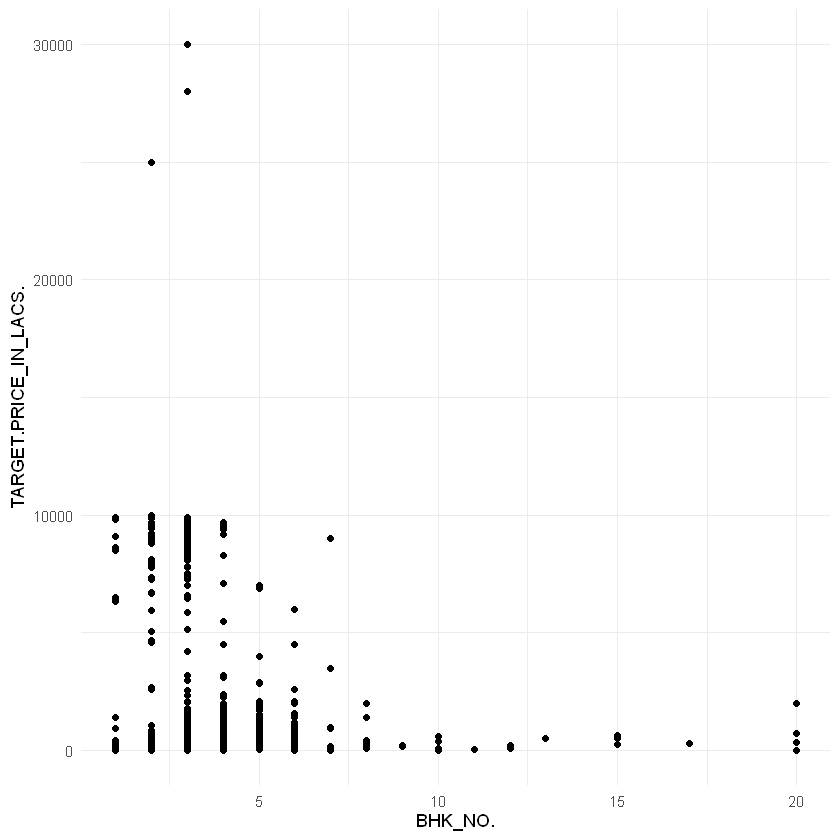

In [19]:
library(ggplot2)

ggplot(data = df, aes(x = .data[[numeric_columns[1]]], y = .data[[numeric_columns[length(numeric_columns)]]])) +
  geom_point() + 
  labs(x = numeric_columns[1], y = numeric_columns[length(numeric_columns)]) +
  theme_minimal() +
  ylim(0, 30000)


# Реализация dotchart как зависимость цены квартиры от её размера

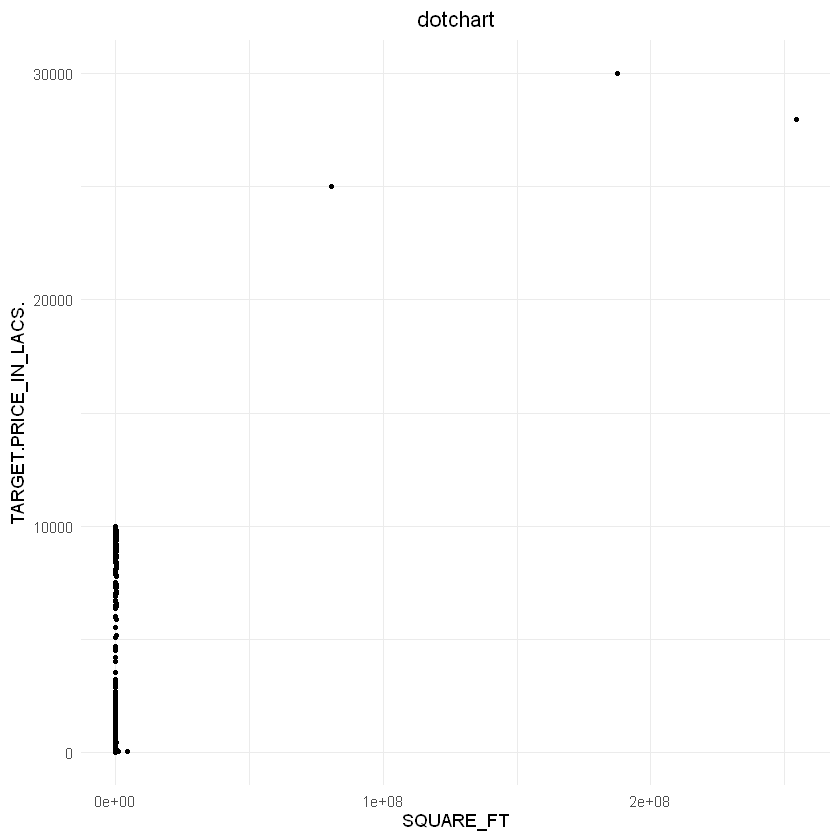

In [50]:
library(ggplot2)


ggplot(df, aes_string(x = numeric_columns[2], y = numeric_columns[length(numeric_columns)])) +
  geom_point(size = 1) + 
  labs(
    title = "dotchart", 
    x = numeric_columns[2], 
    y = numeric_columns[length(numeric_columns)]
  ) +
  theme_minimal() +  
  theme(
    plot.title = element_text(hjust = 0.5)
  ) + 
  scale_y_continuous(limits = c(0, 30000)) 

# Реализация boxplot, например, для долгот и широт квартир и количества комнат в датасете

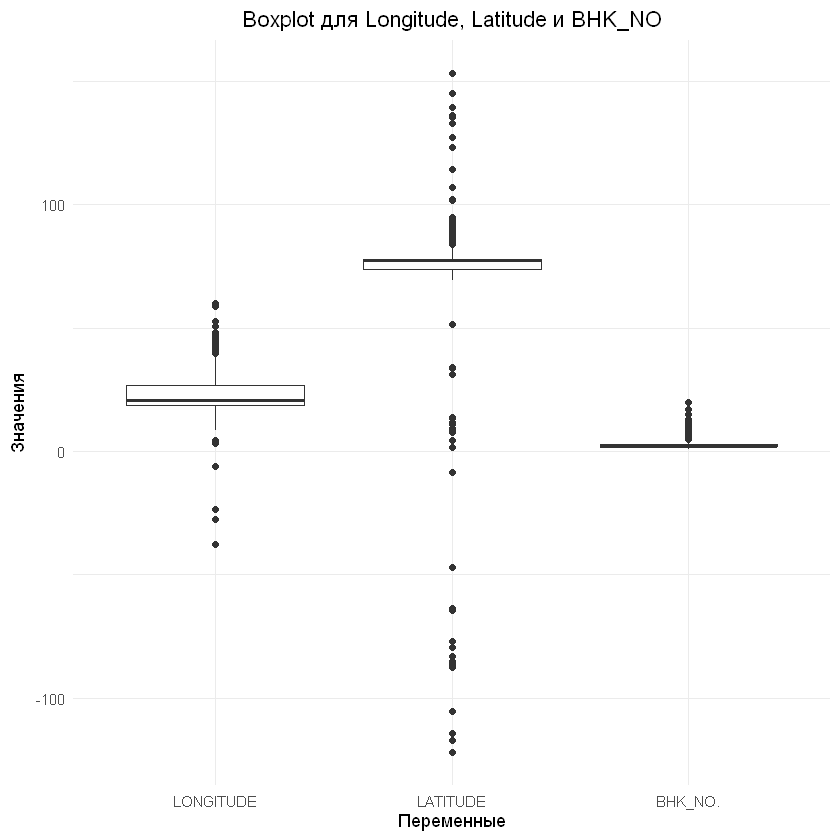

In [49]:
library(ggplot2)
library(reshape2)

df$LONGITUDE <- as.numeric(df$LONGITUDE)
df$LATITUDE <- as.numeric(df$LATITUDE)
df$BHK_NO. <- as.numeric(df$BHK_NO.)

df_long <- melt(df, measure.vars = c("LONGITUDE", "LATITUDE", "BHK_NO."))

ggplot(df_long, aes(x = variable, y = value)) +
  geom_boxplot() + 
  labs(
    title = "Boxplot для Longitude, Latitude и BHK_NO", 
    x = "Переменные", 
    y = "Значения"
  ) +
  theme_minimal() +  
  theme(
    plot.title = element_text(hjust = 0.5)
  )


# Реализация stripchart как зависимость размера квартиры от количества комнат в ней

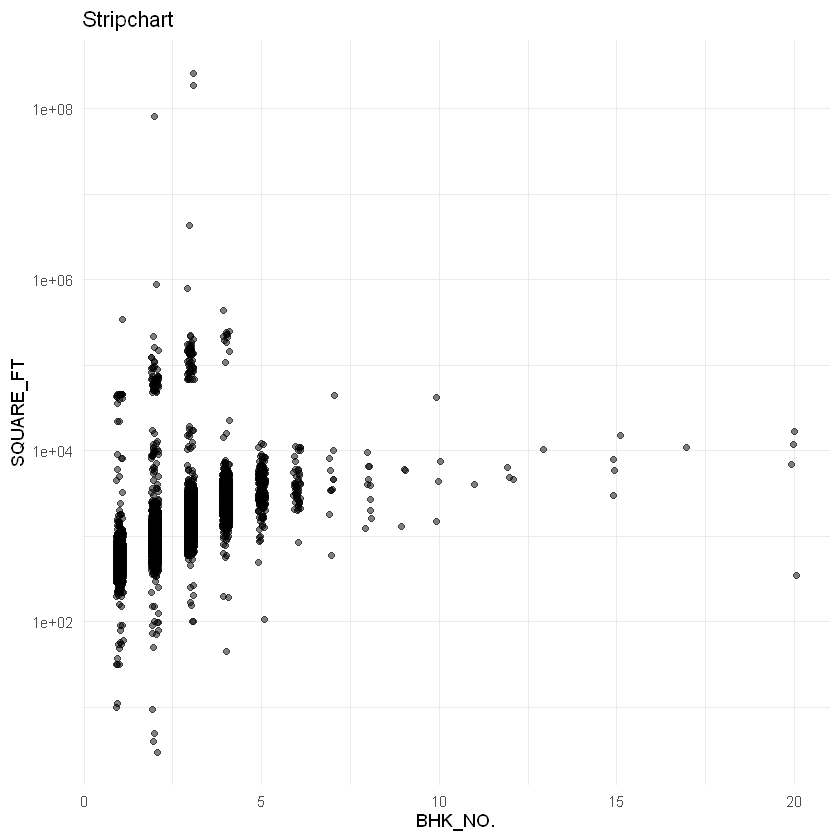

In [55]:
library(ggplot2)

column2 <- "SQUARE_FT" 
column1 <- "BHK_NO."

ggplot(df, aes_string(x = column1, y = column2)) +
  geom_jitter(width = 0.1, height = 0, alpha = 0.5) + 
  scale_y_log10() +  
  labs(title = 'Stripchart', x = column1, y = column2) + 
  theme_minimal()  


# Проверка наблюдений с помощью критерия Граббса, Q-теста Диксона на данных о расположении квартир и количества комнат

### Для визуализации выбросов я использовал boxplot

[1] "Результаты критерия Граббса для BHK_NO. :"

	Grubbs test for one outlier

data:  column_data
G = 3.44545, U = 0.94005, p-value = 0.04751
alternative hypothesis: highest value 9.86155990241361 is an outlier

[1] "Результаты Q-теста Диксона BHK_NO. :"

	Dixon test for outliers

data:  column_data
Q = 0.31841, p-value = 0.489
alternative hypothesis: lowest value 1.53624668653878 is an outlier

[1] "Результаты критерия Граббса для LONGITUDE :"

	Grubbs test for one outlier

data:  column_data
G = 2.53970, U = 0.96742, p-value = 1
alternative hypothesis: highest value 78.2857290729333 is an outlier

[1] "Результаты Q-теста Диксона LONGITUDE :"

	Dixon test for outliers

data:  column_data
Q = 0.40412, p-value = 0.1921
alternative hypothesis: highest value 78.1465394869155 is an outlier

[1] "Результаты критерия Граббса для LATITUDE :"

	Grubbs test for one outlier

data:  column_data
G = 2.94521, U = 0.95619, p-value = 0.2935
alternative hypothesis: lowest value 26.5951126605197 is an 

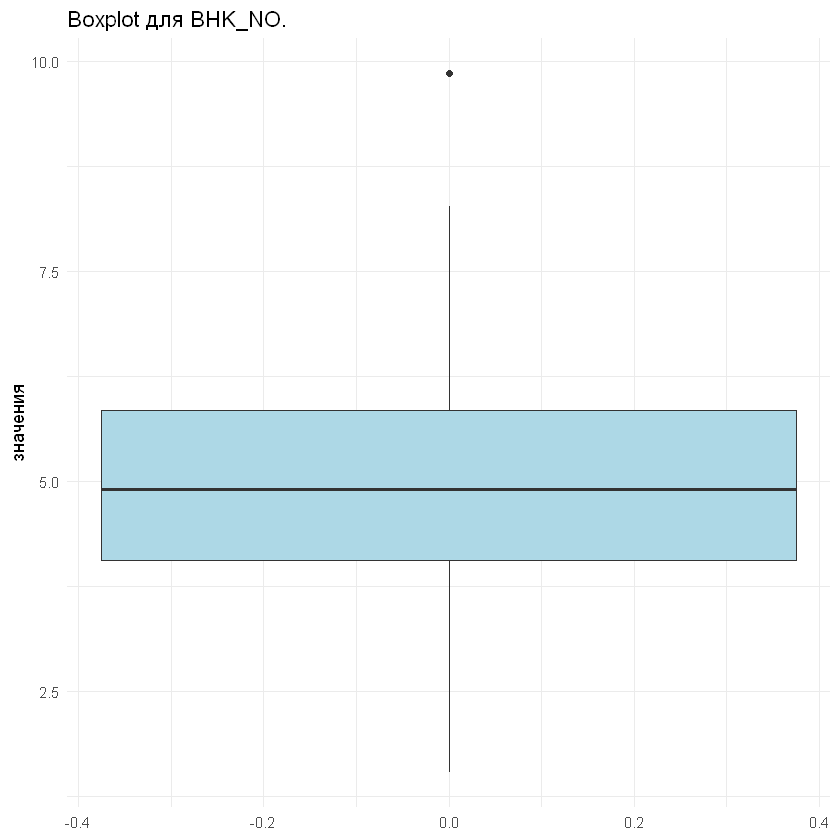

In [5]:
library(outliers)
library(ggplot2)

set.seed(123)
data_size <- 200
df <- data.frame(
  BHK_NO. = rnorm(data_size, mean = 5, sd = 1.5),
  LONGITUDE = rnorm(data_size, mean = 77, sd = 0.5),
  LATITUDE = rnorm(data_size, mean = 28, sd = 0.5)
)


numeric_columns <- c('BHK_NO.', 'LONGITUDE', 'LATITUDE')

check_outliers <- function(column_name) {
  column_data <- df[[column_name]]
  
  grubbs_test <- grubbs.test(column_data)
  print(paste("Результаты критерия Граббса для", column_name, ":"))
  print(grubbs_test)

  column_data <- sample(column_data, size = 20)
  dixon_test <- dixon.test(column_data)
  print(paste("Результаты Q-теста Диксона", column_name, ":"))
  print(dixon_test)

}

for (column in numeric_columns) {
  check_outliers(column)
}
ggplot(df, aes(y = BHK_NO.)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Boxplot для BHK_NO.", y = "значения") +
  theme_minimal()



# Сравнение значений для изменённых данных и исходных. Значения не сильно отличаются, например, немного сдвинулась медиана у LONGITUDE

Значения для исходных данных

In [79]:

library(dplyr)
library(tidyr)

df_with_na <- df

set.seed(50) 
na_positions <- sample(1:nrow(df_with_na), 30)
for(column in numeric_columns) {
  df_with_na[na_positions, column] <- NA
}


df_with_na <- df_with_na %>%
  mutate(across(all_of(numeric_columns), ~if_else(is.na(.), mean(., na.rm = TRUE), .)))

summary(df)


  POSTED_BY         UNDER_CONSTRUCTION      RERA           BHK_NO.      
 Length:29451       Min.   :0.0000     Min.   :0.0000   Min.   : 1.000  
 Class :character   1st Qu.:0.0000     1st Qu.:0.0000   1st Qu.: 2.000  
 Mode  :character   Median :0.0000     Median :0.0000   Median : 2.000  
                    Mean   :0.1798     Mean   :0.3179   Mean   : 2.392  
                    3rd Qu.:0.0000     3rd Qu.:1.0000   3rd Qu.: 3.000  
                    Max.   :1.0000     Max.   :1.0000   Max.   :20.000  
  BHK_OR_RK           SQUARE_FT         READY_TO_MOVE        RESALE      
 Length:29451       Min.   :        3   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:      900   1st Qu.:1.0000   1st Qu.:1.0000  
 Mode  :character   Median :     1175   Median :1.0000   Median :1.0000  
                    Mean   :    19802   Mean   :0.8202   Mean   :0.9296  
                    3rd Qu.:     1551   3rd Qu.:1.0000   3rd Qu.:1.0000  
                    Max.   :254545454   Max. 

Значения для изменённых данных

In [80]:
summary(df_with_na)

  POSTED_BY         UNDER_CONSTRUCTION      RERA           BHK_NO.      
 Length:29451       Min.   :0.0000     Min.   :0.0000   Min.   : 1.000  
 Class :character   1st Qu.:0.0000     1st Qu.:0.0000   1st Qu.: 2.000  
 Mode  :character   Median :0.0000     Median :0.0000   Median : 2.000  
                    Mean   :0.1798     Mean   :0.3179   Mean   : 2.392  
                    3rd Qu.:0.0000     3rd Qu.:1.0000   3rd Qu.: 3.000  
                    Max.   :1.0000     Max.   :1.0000   Max.   :20.000  
  BHK_OR_RK           SQUARE_FT         READY_TO_MOVE        RESALE      
 Length:29451       Min.   :        3   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:      900   1st Qu.:1.0000   1st Qu.:1.0000  
 Mode  :character   Median :     1175   Median :1.0000   Median :1.0000  
                    Mean   :    19802   Mean   :0.8202   Mean   :0.9296  
                    3rd Qu.:     1551   3rd Qu.:1.0000   3rd Qu.:1.0000  
                    Max.   :254545454   Max. 

# Анализ с помощью графиков эмпирических функций распределений, квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности

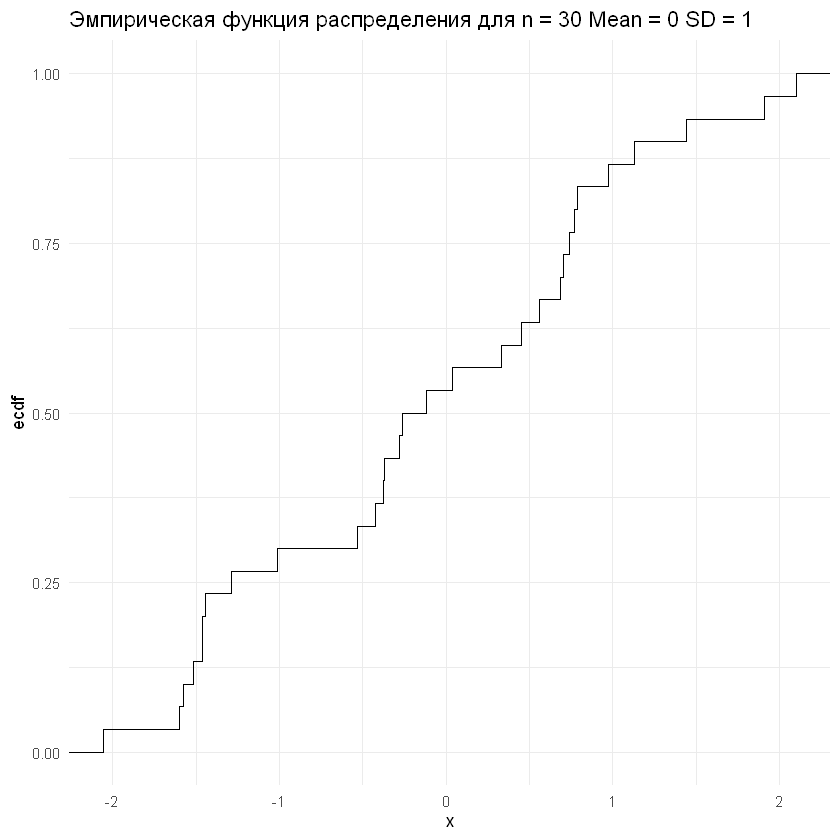

Результаты тестов для малой выборки (n = 30):
$`Критерий Колмогорова-Смирнова`
[1] 0.3305222

$`Критерий Шапиро-Уилка`
[1] 0.267425

$`Критерий Андерсона-Дарлинга`
[1] 0.2338505

$`Критерий Крамера-фон Мизеса`
[1] 0.2867824

$`Критерий Колмогорова в модификации Лиллиефорса`
[1] 0.3356876

$`Критерий Колмогорова в модификации Шапиро-Франсия`
[1] 0.378955



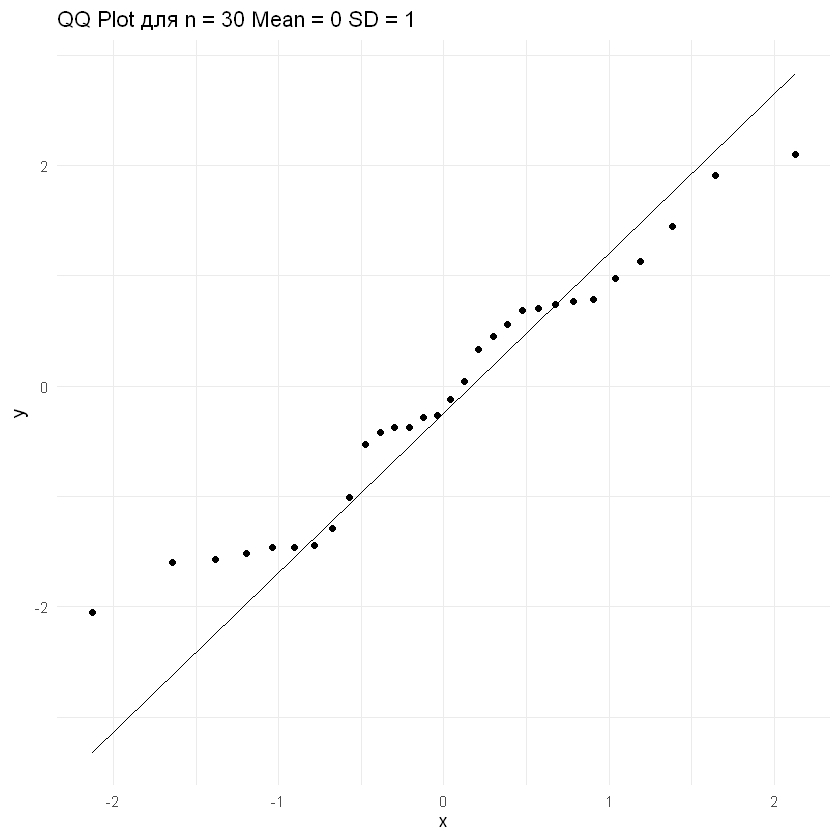

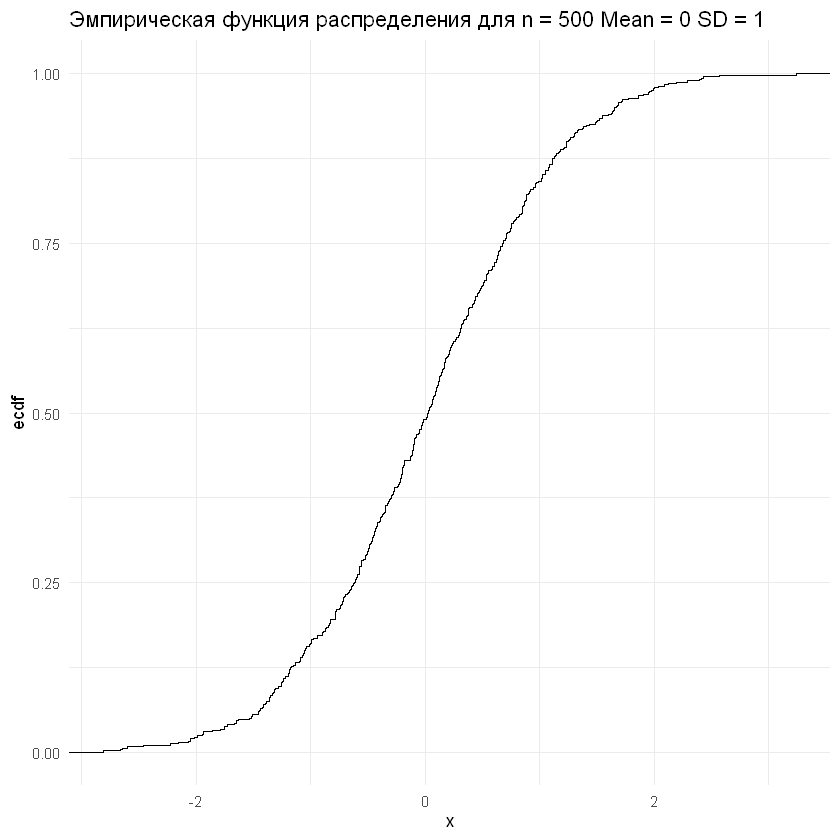

Результаты тестов для умеренной выборки (n = 500):
$`Критерий Колмогорова-Смирнова`
[1] 0.9819925

$`Критерий Шапиро-Уилка`
[1] 0.9919268

$`Критерий Андерсона-Дарлинга`
[1] 0.9945516

$`Критерий Крамера-фон Мизеса`
[1] 0.9967237

$`Критерий Колмогорова в модификации Лиллиефорса`
[1] 0.9993028

$`Критерий Колмогорова в модификации Шапиро-Франсия`
[1] 0.9899983



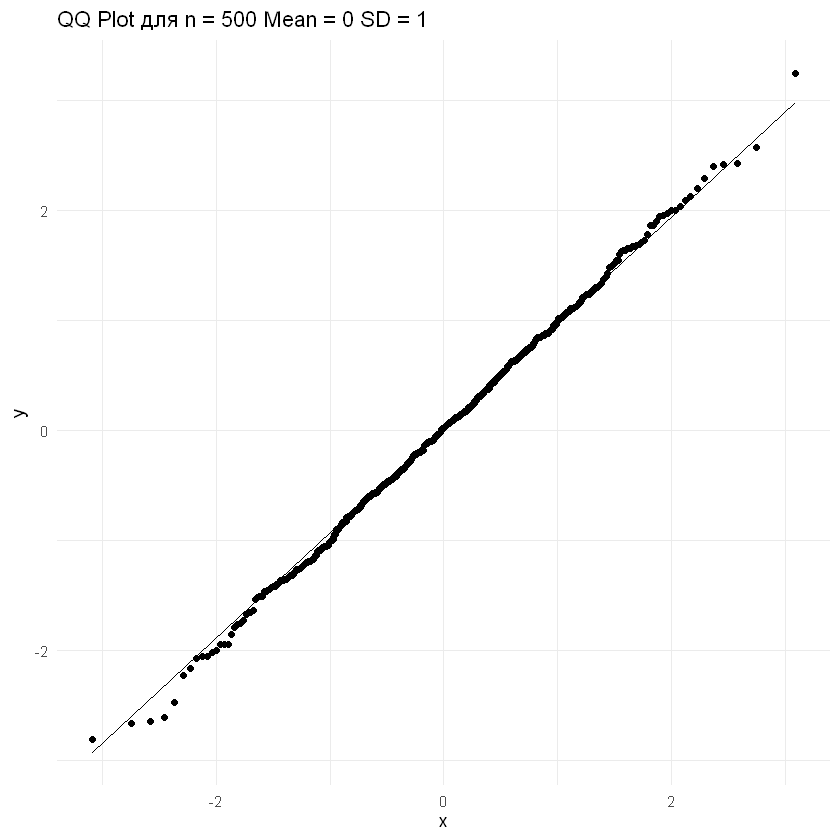

In [105]:
library(ggplot2)
library(nortest)
library(MASS)

analyze_normality <- function(mean, sd, n_samples) {
  data <- rnorm(n_samples, mean, sd)
  
  ecdf_plot <- ggplot(data.frame(x = data), aes(x)) +
    stat_ecdf(geom = "step") +
    labs(title = paste("Эмпирическая функция распределения для n =", n_samples, "Mean =", mean, "SD =", sd))

  qq_plot <- ggplot(data.frame(x = data), aes(sample = x)) +
    stat_qq() +
    stat_qq_line() +
    labs(title = paste("QQ Plot для n =", n_samples, "Mean =", mean, "SD =", sd))
  

  tests_results <- list()

  ks_test <- ks.test(data, "pnorm", mean=mean, sd=sd)
  tests_results$`Критерий Колмогорова-Смирнова` <- ks_test$p.value
    
  shapiro_test <- shapiro.test(data)
  tests_results$`Критерий Шапиро-Уилка` <- shapiro_test$p.value

  ad_test <- ad.test(data)
  tests_results$`Критерий Андерсона-Дарлинга` <- ad_test$p.value

  cvm_test <- cvm.test(data)
  tests_results$`Критерий Крамера-фон Мизеса` <- cvm_test$p.value

  lillie_test <- lillie.test(data)
  tests_results$`Критерий Колмогорова в модификации Лиллиефорса` <- lillie_test$p.value

  shapiro_francia_test <- sf.test(data)
  tests_results$`Критерий Колмогорова в модификации Шапиро-Франсия` <- shapiro_francia_test$p.value
  return(list(ecdf_plot = ecdf_plot, qq_plot = qq_plot,  tests_results = tests_results))
}

theme_set(theme_minimal())

results_small <- analyze_normality(mean = 0, sd = 1, n_samples = 30)

print(results_small$ecdf_plot)
print(results_small$qq_plot)


cat("Результаты тестов для малой выборки (n = 30):\n")
print(results_small$tests_results)

results_moderate <- analyze_normality(mean = 0, sd = 1, n_samples = 500)

print(results_moderate$ecdf_plot)
print(results_moderate$qq_plot)
 

cat("Результаты тестов для умеренной выборки (n = 500):\n")
print(results_moderate$tests_results)


## Анализ данных с использованием метода огибающих

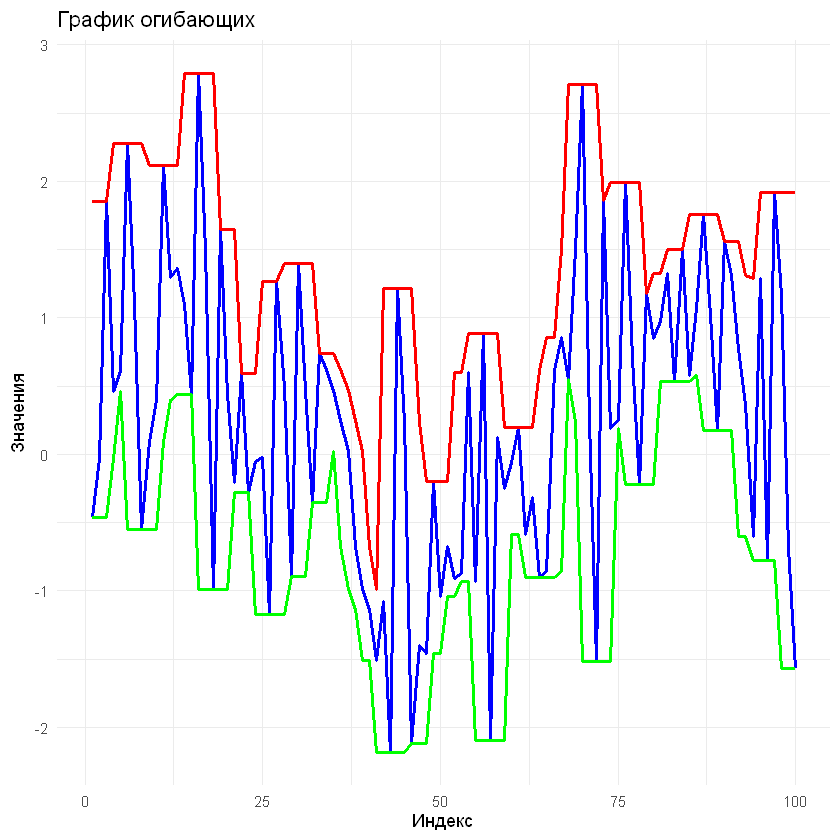

In [103]:
library(ggplot2)
library(dplyr)
library(zoo)

set.seed(123) 
n <- 100
x <- seq(1, n)
y <- rnorm(n, mean = 0, sd = 1) + sin(0.1 * x)

upper_envelope <- rollapply(y, width = 5, FUN = max, align = "center", fill = NA)
lower_envelope <- rollapply(y, width = 5, FUN = min, align = "center", fill = NA)

upper_envelope <- na.locf(na.locf(upper_envelope, na.rm = FALSE), fromLast = TRUE)
lower_envelope <- na.locf(na.locf(lower_envelope, na.rm = FALSE), fromLast = TRUE)

data <- data.frame(x = x, y = y, upper = upper_envelope, lower = lower_envelope)

ggplot(data, aes(x = x)) +
  geom_line(aes(y = y), color = "blue", linewidth = 1) +  
  geom_line(aes(y = upper), color = "red", linewidth = 1) +  
  geom_line(aes(y = lower), color = "green", linewidth = 1) +   
  labs(title = "График огибающих",
       y = "Значения", x = "Индекс") +
  theme_minimal()


# Анализ столбца исходных данных LONGITUDE с помощью графиков эмпирических функций распределений, квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности

Warning message in ks.test(data_column, "pnorm", mean = mean(data_column), sd = sd(data_column)):
"ties should not be present for the Kolmogorov-Smirnov test"Warning message in cvm.test(data_column):
"p-value is smaller than 7.37e-10, cannot be computed more accurately"

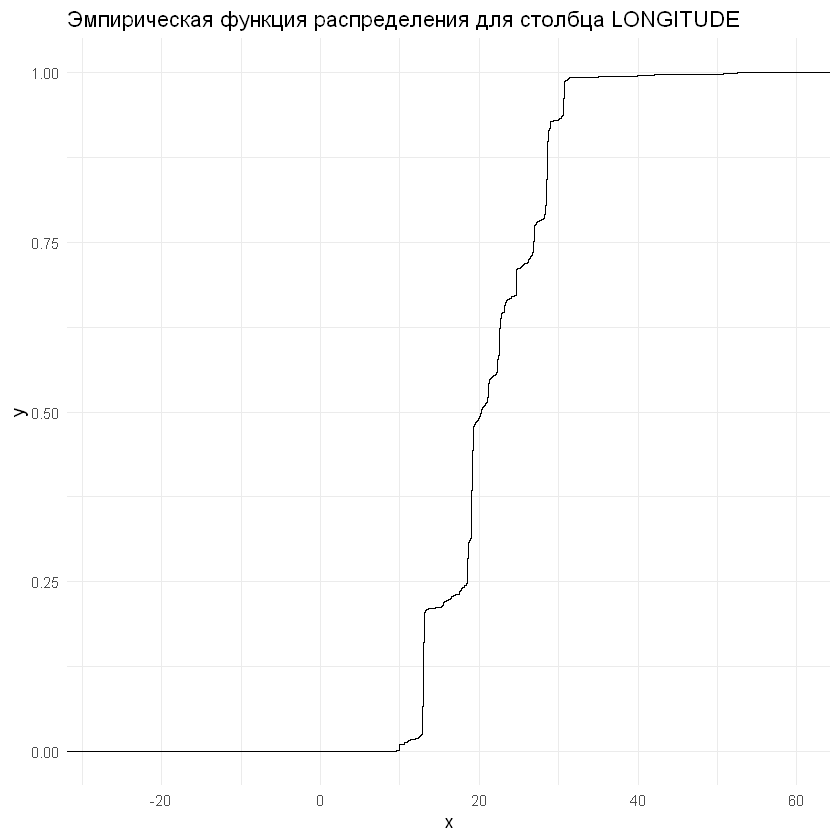

Результаты тестов для столбца LONGITUDE:
$`Критерий Колмогорова-Смирнова`
[1] 0

$`Критерий Шапиро-Уилка`
[1] 2.320846e-43

$`Критерий Андерсона-Дарлинга`
[1] 3.7e-24

$`Критерий Крамера-фон Мизеса`
[1] 7.37e-10

$`Критерий Колмогорова в модификации Лиллиефорса`
[1] 6.339021e-161

$`Критерий Колмогорова в модификации Шапиро-Франция`
[1] 8.647217e-42



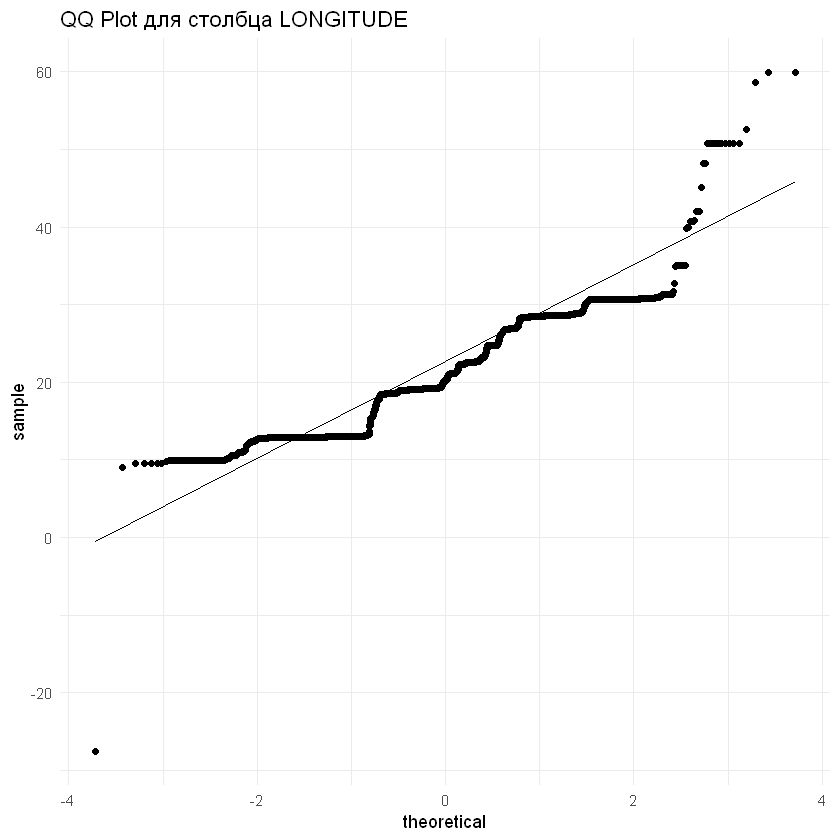

In [9]:
library(ggplot2)
library(nortest)
library(MASS)

analyze_normality <- function(data_column) {
  ecdf_plot <- ggplot(data.frame(x = data_column), aes(x)) +
    stat_ecdf(geom = "step") +
    labs(title = "Эмпирическая функция распределения для столбца LONGITUDE")

  qq_plot <- ggplot(data.frame(x = data_column), aes(sample = x)) +
    stat_qq() +
    stat_qq_line() +
    labs(title = "QQ Plot для столбца LONGITUDE")

  tests_results <- list()

  ks_test <- ks.test(data_column, "pnorm", mean = mean(data_column), sd = sd(data_column))
  tests_results$`Критерий Колмогорова-Смирнова` <- ks_test$p.value

  shapiro_test <- shapiro.test(data_column)
  tests_results$`Критерий Шапиро-Уилка` <- shapiro_test$p.value

  ad_test <- ad.test(data_column)
  tests_results$`Критерий Андерсона-Дарлинга` <- ad_test$p.value

  cvm_test <- cvm.test(data_column)
  tests_results$`Критерий Крамера-фон Мизеса` <- cvm_test$p.value

  lillie_test <- lillie.test(data_column)
  tests_results$`Критерий Колмогорова в модификации Лиллиефорса` <- lillie_test$p.value

  shapiro_francia_test <- sf.test(data_column)
  tests_results$`Критерий Колмогорова в модификации Шапиро-Франция` <- shapiro_francia_test$p.value

  return(list(ecdf_plot = ecdf_plot, qq_plot = qq_plot, tests_results = tests_results))
}

theme_set(theme_minimal())

longitude_data <- data$LONGITUDE
set.seed(123)  # Set seed for reproducibility
longitude_data <- sample(longitude_data, 5000)
  
results_longitude <- analyze_normality(longitude_data)

print(results_longitude$ecdf_plot)
print(results_longitude$qq_plot)

cat("Результаты тестов для столбца LONGITUDE:\n")
print(results_longitude$tests_results)



### Все тесты для столбца LONGITUDE исходного датафрейма показали, что данные в нём распределены не нормально. Графики показывают то же самое